In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_sets_5g_1_lqr = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-1/lqr-all-dn/"

data_sets_5g_1_pid = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-1/pid-all-dn/"

data_sets_5g_1_pid_angle = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-1/pid-angle-dn/"

data_sets_5g_1_lqr_angle = "/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-1/lqr-angle-dn/"


In [3]:
def stable_time(df_delay, threshold=0.00872665, window_duration=5.0):
    t = df_delay['t'].values
    angle = np.abs(df_delay['phi'].values)
    is_stable = angle < threshold
    n = len(t)
    start_idx = 0
    end_idx = 0

    while start_idx < n:
        while end_idx < n and t[end_idx] - t[start_idx] < window_duration:
            end_idx += 1
        
        if end_idx == n:
            break

        if is_stable[start_idx:end_idx].all():
            return t[start_idx]

        start_idx += 1

    return float("inf")

In [4]:
def median(data_sets, t):
    phi_medians = []
    phi_mse = []
    for filename in os.listdir(data_sets):
        if filename.endswith(".csv"):
            filepath = os.path.join(data_sets, filename)
            df = pd.read_csv(filepath, names= ['t', 'position', 'vx', 'phi', 'omega'], header=None, skiprows=1)
            df = df[df["t"] <= t]
            if "phi" in df.columns:
                
                df["phi_deg"] = np.degrees(df["phi"])
                print(filename)
                print("Maximaler phi_deg-Wert:", df["phi_deg"].max())
                print(f"Stabilization time: {stable_time(df):.6f}")
                median_phi = df["phi_deg"].median()
                phi_mse.append((df["phi_deg"]**2).mean())
                phi_medians.append(median_phi)
    phi_medians_sorted = np.sort(phi_medians)

    # 99% Confidence interval
    confidence_level = 0.99
    n = len(phi_medians_sorted )
    
    z = 1.288  # z-value for  99 % CI
    lower_idx = max(0, int(np.floor(0.5 * n - z * np.sqrt(n))))
    upper_idx = min(n - 1, int(np.ceil(0.5 * n + z * np.sqrt(n))))
    
    ci_lower = phi_medians_sorted[lower_idx]
    ci_upper = phi_medians_sorted[upper_idx]
    median = np.median(phi_medians_sorted )
    df = pd.DataFrame(phi_medians_sorted, columns=["medians"])
    summary = df["medians"].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])
    print(summary)
    print(f"99% Confidence Interval for Median phy: [{ci_lower:.6f}, {ci_upper:.6f}]")
    
    return phi_medians_sorted, phi_mse

In [5]:
t = 60

In [6]:
phi_medians_5g_1_lqr, phi_mse_lqr = median(data_sets_5g_1_lqr, t)

lqr-all-dn-12.csv
Maximaler phi_deg-Wert: 20.6096929613123
Stabilization time: 5.427500
lqr-all-dn-6.csv
Maximaler phi_deg-Wert: 20.57823757835962
Stabilization time: 5.427800
lqr-all-dn-29.csv
Maximaler phi_deg-Wert: 20.603734200242943
Stabilization time: 5.427500
lqr-all-dn-13.csv
Maximaler phi_deg-Wert: 20.5764041134152
Stabilization time: 5.427800
lqr-all-dn-18.csv
Maximaler phi_deg-Wert: 20.58562873391681
Stabilization time: 5.427800
lqr-all-dn-16.csv
Maximaler phi_deg-Wert: 20.582076395587
Stabilization time: 5.427800
lqr-all-dn-7.csv
Maximaler phi_deg-Wert: 20.58792056509733
Stabilization time: 5.427800
lqr-all-dn-8.csv
Maximaler phi_deg-Wert: 20.599093242102384
Stabilization time: 5.427600
lqr-all-dn-23.csv
Maximaler phi_deg-Wert: 20.60104129860583
Stabilization time: 5.427700
lqr-all-dn-19.csv
Maximaler phi_deg-Wert: 20.58706112840464
Stabilization time: 5.427700
lqr-all-dn-27.csv
Maximaler phi_deg-Wert: 20.59072805829347
Stabilization time: 5.427800
lqr-all-dn-0.csv
Maximaler

In [7]:
phi_mse_sorted = np.sort(phi_mse_lqr)
median_mse = np.median(phi_mse_sorted)

print(f"MSE median: {median_mse:.6f}")

MSE median: 3.190685


In [8]:
phi_medians_5g_1_pid, phi_mse_pid = median(data_sets_5g_1_pid, t)

pid-all-dn-28.csv
Maximaler phi_deg-Wert: 20.31467699259944
Stabilization time: 8.170700
pid-all-dn-27.csv
Maximaler phi_deg-Wert: 23.13466066867433
Stabilization time: 7.798000
pid-all-dn-3.csv
Maximaler phi_deg-Wert: 20.063434999434577
Stabilization time: 9.819900
pid-all-dn-7.csv
Maximaler phi_deg-Wert: 20.05146018151634
Stabilization time: 9.811200
pid-all-dn-13.csv
Maximaler phi_deg-Wert: 20.047449476950426
Stabilization time: 10.399700
pid-all-dn-4.csv
Maximaler phi_deg-Wert: 20.059882661104766
Stabilization time: 9.242100
pid-all-dn-15.csv
Maximaler phi_deg-Wert: 20.32097952834588
Stabilization time: 8.161100
pid-all-dn-24.csv
Maximaler phi_deg-Wert: 399.77958267914653
Stabilization time: inf
pid-all-dn-2.csv
Maximaler phi_deg-Wert: 20.049855899689977
Stabilization time: 10.408500
pid-all-dn-25.csv
Maximaler phi_deg-Wert: 20.275830454089572
Stabilization time: 8.189000
pid-all-dn-9.csv
Maximaler phi_deg-Wert: 20.05146018151634
Stabilization time: 10.408300
pid-all-dn-18.csv
Maxi

In [9]:
phi_mse_sorted = np.sort(phi_mse_pid)
median_mse = np.median(phi_mse_sorted)

print(f"MSE pid median: {median_mse:.6f}")

MSE pid median: 3.316356


In [10]:
phi_medians_5g_1_pid_angle, phi_mse_pid_angle = median(data_sets_5g_1_pid_angle, t)

pid-angle-dn-17.csv
Maximaler phi_deg-Wert: 20.061544238710646
Stabilization time: 3.002900
pid-angle-dn-20.csv
Maximaler phi_deg-Wert: 20.20902357517732
Stabilization time: 4.953100
pid-angle-dn-29.csv
Maximaler phi_deg-Wert: 20.21761794210428
Stabilization time: 4.962100
pid-angle-dn-21.csv
Maximaler phi_deg-Wert: 20.191147291969237
Stabilization time: 4.932500
pid-angle-dn-5.csv
Maximaler phi_deg-Wert: 20.180261093861752
Stabilization time: 4.917700
pid-angle-dn-0.csv
Maximaler phi_deg-Wert: 20.05220502665001
Stabilization time: 1.469200
pid-angle-dn-1.csv
Maximaler phi_deg-Wert: 20.05552818186177
Stabilization time: 4.544900
pid-angle-dn-19.csv
Maximaler phi_deg-Wert: 20.05220502665001
Stabilization time: 4.095000
pid-angle-dn-27.csv
Maximaler phi_deg-Wert: 20.056387618554467
Stabilization time: 6.380400
pid-angle-dn-11.csv
Maximaler phi_deg-Wert: 20.053007167563194
Stabilization time: 2.043600
pid-angle-dn-14.csv
Maximaler phi_deg-Wert: 20.209367349854396
Stabilization time: 4.949

In [11]:
phi_mse_sorted = np.sort(phi_mse_pid_angle)
median_mse = np.median(phi_mse_sorted)

print(f"MSE pid_angle median: {median_mse:.6f}")

MSE pid_angle median: 2.110044


In [12]:
phi_medians_5g_1_lqr_angle, phi_mse_lqr_angle = median(data_sets_5g_1_lqr_angle, t)

lqr-angle-dn-7.csv
Maximaler phi_deg-Wert: 20.061945309167236
Stabilization time: 2.558300
lqr-angle-dn-6.csv
Maximaler phi_deg-Wert: 20.05718975946765
Stabilization time: 2.553200
lqr-angle-dn-25.csv
Maximaler phi_deg-Wert: 20.061945309167236
Stabilization time: 2.558700
lqr-angle-dn-21.csv
Maximaler phi_deg-Wert: 20.065841422174124
Stabilization time: 2.563600
lqr-angle-dn-15.csv
Maximaler phi_deg-Wert: 20.075066042675733
Stabilization time: 2.573200
lqr-angle-dn-28.csv
Maximaler phi_deg-Wert: 20.07300339461326
Stabilization time: 2.571800
lqr-angle-dn-27.csv
Maximaler phi_deg-Wert: 20.067904070236594
Stabilization time: 2.566200
lqr-angle-dn-17.csv
Maximaler phi_deg-Wert: 20.074034718644498
Stabilization time: 2.571700
lqr-angle-dn-29.csv
Maximaler phi_deg-Wert: 20.07615466248648
Stabilization time: 2.571700
lqr-angle-dn-2.csv
Maximaler phi_deg-Wert: 20.060054548443304
Stabilization time: 2.556700
lqr-angle-dn-26.csv
Maximaler phi_deg-Wert: 20.08154046576071
Stabilization time: 2.57

In [14]:
phi_mse_sorted = np.sort(phi_mse_lqr_angle)
median_mse = np.median(phi_mse_sorted)

print(f"MSE lqr_angle median: {median_mse:.6f}")

MSE lqr_angle median: 0.705792


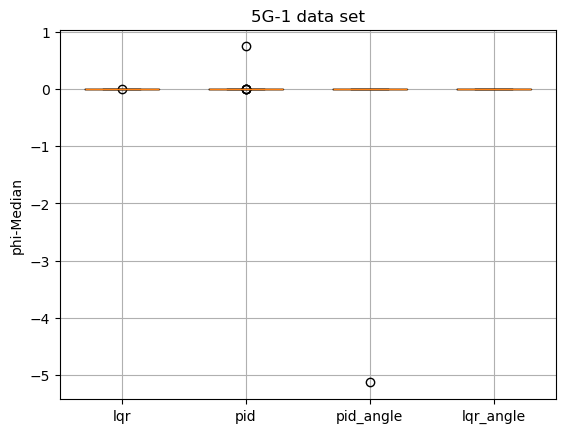

In [15]:
data = [phi_medians_5g_1_lqr, phi_medians_5g_1_pid, phi_medians_5g_1_pid_angle, phi_medians_5g_1_lqr_angle]

plt.boxplot(data, positions=[1, 2, 3,4,], widths=0.6)
plt.xticks([1, 2,3 ,4], ['lqr', 'pid', 'pid_angle', 'lqr_angle'])
plt.title("5G-1 data set")
plt.ylabel("phi-Median")
plt.grid(True)


plt.savefig('5g_1_plotbox.png', dpi=300)
plt.show()

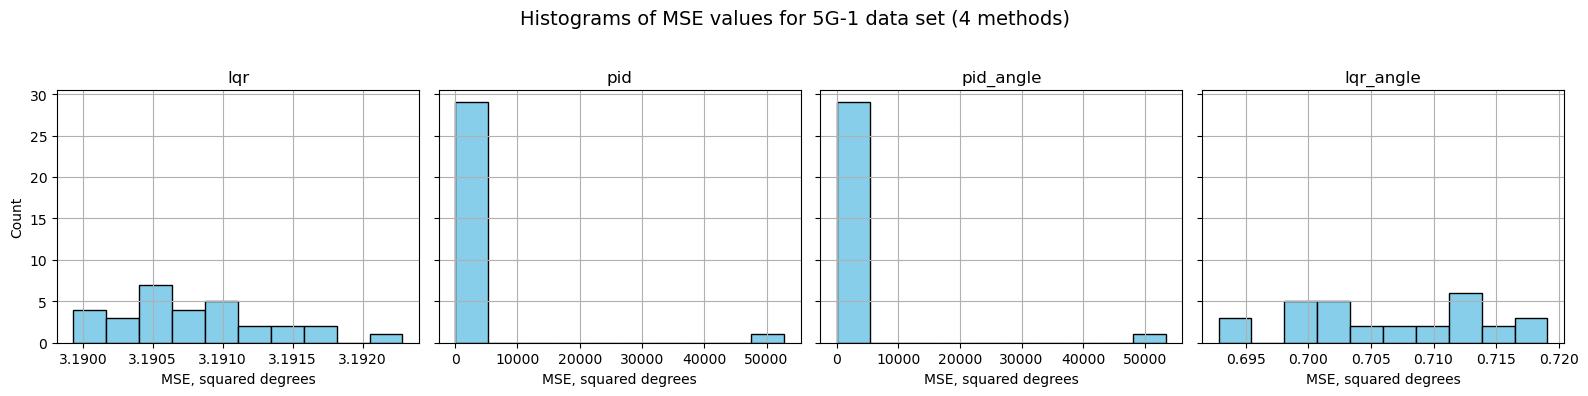

In [16]:
mse_dict = {
    'lqr': phi_mse_lqr,
    'pid': phi_mse_pid,
    'pid_angle': phi_mse_pid_angle,
    'lqr_angle': phi_mse_lqr_angle,
}

# Plot Setup
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for i, (label, data) in enumerate(mse_dict.items()):
    axs[i].hist(data, bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(label)
    axs[i].set_xlabel('MSE, squared degrees')
    axs[i].grid(True)

axs[0].set_ylabel('Count')
plt.suptitle('Histograms of MSE values for 5G-1 data set (4 methods)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('5g_1_mse_hist.png', dpi=300)
plt.show()